## Fourier Series and Fourier Transforms 

### Contents

#### i) Fourier Series

#### ii) Discrete Fourier Series

#### iii) Fourier Transform

#### iv) Discrete Fourier Transform

#### v) Fast Fourier Transform

In [1]:
#inmtegration using Simpson's 1/3 rule
from simp13X import*
from math import*
def simp13Xdis(h,fx):
    #h denotes the step length 
    #fx denotes the discrete y-values of the list
    n=len(fx)
    f2=0
    for i in range(n):
        if i==0 or i==n-1:
            f2=f2+fx[i]
        elif i%2==0:
            f2=f2+2*fx[i]
        else:
            f2=f2+4*fx[i]
    f2=f2*(h/3)
    return f2

In [2]:
#Function returning the Fourier Coefficients
def coeffs(f_nu,N):
    P=len(f_nu)
    nu=[i for i in range(P)]
    anbn=[]
    for n in range(N+1):
        Fc_nu=[f_nu[i]*cos(2*pi*n*nu[i]/P) for i in range(P)]
        Fs_nu=[f_nu[i]*sin(2*pi*n*nu[i]/P) for i in range(P)]
        an=(2/P)*simp13Xdis(1,Fc_nu)
        bn=(2/P)*simp13Xdis(1,Fs_nu)
        anbn.append([an,bn])
    return anbn
#Function returning the list of fourier series of different harminics
def FourSeries(P,anbn):
    nu=[i for i in range(P)]
    F_nu=[0 for i in range(P)]
    for n in range(len(anbn)):
        a=anbn[n][0]
        b=anbn[n][1]
        if n == 0:
            a=a/2
        for i in range(P):
            F_nu[i]+=a*cos(2*pi*n*nu[i]/P)+b*sin(2*pi*n*nu[i]/P)
    return F_nu

##### Square Wave

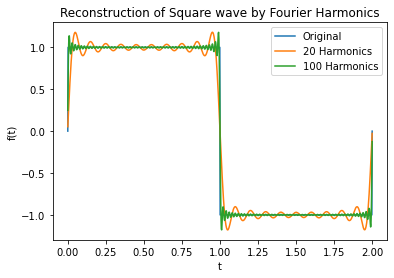

In [3]:
import matplotlib.pyplot as plt
def SqWv(pr,t):
    T,W0=pr
    if abs((t%T)-0.25*T)<0.25*T:
        ft1=W0
    else:
        ft1=0
    if abs((t%T)-0.75*T)<0.25*T:
        ft2=W0
    else:
        ft2=0
    return ft1-ft2
Nt=1000
T,W0=2,1
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[SqWv([T,W0],t[i]) for  i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of Square wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

##### Saw-tooth Wave

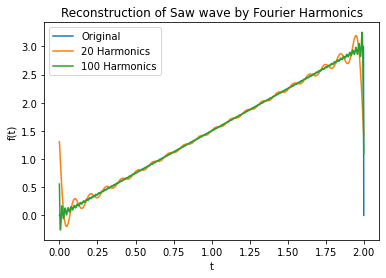

In [4]:
def sawTooth(pr,t):
    T,W0=pr
    return 0.5*W0*(t%T)
    return ft1-ft2
Nt=1000
T,W0=2,3
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[sawTooth([T,W0],t[i]) for  i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of Saw wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

##### Triangular Wave

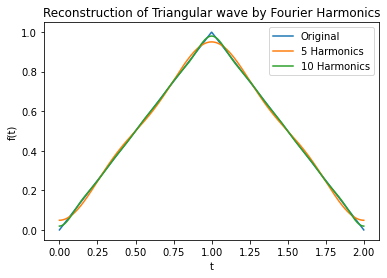

In [5]:
def trnglWv(pr,t):
    T,W0=pr
    if int(2*t/T)%2 ==0:
        W=W0*(t%T)
    else:
        W=W0*(T-(t%T))
    return W
Nt=1000
T,W0=2,1
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[trnglWv([T,W0],t[i]) for i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of Triangular wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:5]),label="5 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:10]),label="10 Harmonics")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()


##### Arbitary signal

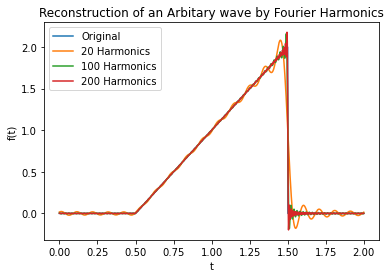

In [6]:
def signal(pr,t):
    T,W0=pr
    if abs((t%T)-0.5*T)< 0.25*T:
        ft1=W0
    else:
        ft1=0
    if abs((t%T)-0.5*T)<0.25*T:
        ft2=2*(abs(t%T)-0.5*T)*W0
    else:
        ft2=0
    return ft1+ft2
Nt=1000
T,W0=2,1
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[signal([T,W0],t[i]) for i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of an Arbitary wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:200]),label="200 Harmonics")

plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()


##### Arbitary signal

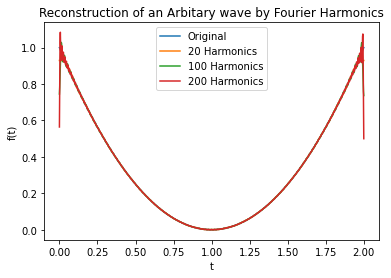

In [7]:
def signal(pr,t):
    T,W0=pr
    
    return W0*((t%T)-0.5*T)**2
Nt=1000
T,W0=2,1
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[tmn+dt*i for i in range(Nt)]
ft=[signal([T,W0],t[i]) for i in range(Nt)]
cfs=coeffs(ft,200)
plt.title('Reconstruction of an Arbitary wave by Fourier Harmonics')
plt.plot(t,ft,label="Original")
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:200]),label="200 Harmonics")

plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()


In [8]:
from scipy import signal

In [9]:
import numpy as np

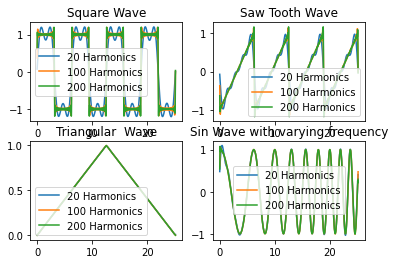

In [10]:
Nt=1000
T,W0=2,1
tmn,tmx=0,2
dt=(tmx-tmn)/(Nt-1)
t=[2*np.pi*2*(tmn+dt*i) for i in range(Nt)]

ft=signal.square(t)
cfs=coeffs(ft,200)

plt.subplot(221)
plt.title('Square Wave')
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:200]),label="200 Harmonics")
plt.legend()

ft=signal.sawtooth(t)
cfs=coeffs(ft,200)

plt.subplot(222)
plt.title('Saw Tooth Wave')
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:200]),label="200 Harmonics")
plt.legend()

ft=signal.triang(Nt)
cfs=coeffs(ft,200)

plt.subplot(223)
plt.title('Triangular  Wave')
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:200]),label="200 Harmonics")
plt.legend()

ft=signal.sweep_poly(t,[0.02,0.1])
cfs=coeffs(ft,200)

plt.subplot(224)
plt.title('Sin Wave with varying frequency')
plt.plot(t,FourSeries(Nt,cfs[:20]),label="20 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:100]),label="100 Harmonics")
plt.plot(t,FourSeries(Nt,cfs[:200]),label="200 Harmonics")
plt.legend()


plt.legend()
plt.show()


##### Discrete Fourire Transform

In [11]:
from cmath import*

In [12]:
def dft(ft,isg):
    N=len(ft)
    Fs=[]
    for m in range(N):
        Fk=0
        for n in range(N):
            Fk+=ft[n]*exp(-isg*2*pi*1j*m*n/N)
        if isg == 1:
            Fs.append(Fk)
        elif isg==-1:
            Fs.append(Fk/N)
    return Fs

f(t)=1+t (-1<t<0) 

 f(t)=1-t (0<=t<1) 

else 0

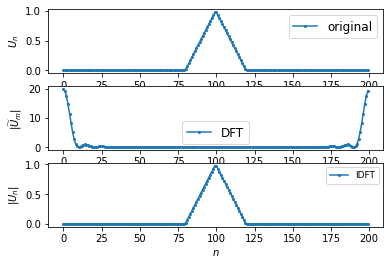

In [13]:
def f(t):
    if -1<t<0:
        ft=1+t
    elif 0<=t<1:
        ft=1-t
    else:
        ft=0
    return ft
tmn=-5
tmx=5
N=200
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
FT=dft(ft,1)
IFT=dft(FT,-1)


plt.subplot(311)
plt.plot(ft,linestyle='-',marker='.',ms=4,label='original')
plt.legend(loc='best',prop={'size':12})
plt.ylabel(r'$U_n$')
plt.xlabel(r'$n$')    

plt.subplot(312)
plt.plot([abs(FT[i]) for i in range(N)],linestyle='-',marker='.',ms=4,label='DFT')
plt.legend(loc='best',prop={'size':12})
plt.ylabel(r'$|\widetilde{U}_m|$')
plt.xlabel(r'$m$')  

plt.subplot(313)
plt.plot([abs(IFT[i]) for i in range(N)],linestyle='-',marker='.',ms=4,label='IDFT')
plt.legend(loc='best',prop={'size':9})
plt.ylabel(r'$|U_n|$')
plt.xlabel(r'$n$')  

plt.show()

##### Centered Discrete Fourier Transform

In [14]:
def cntDFT(ft,isg):
    N=len(ft)
    a=(N-1)/2
    exft=[exp(2j*pi*a*i/N) * ft[i] for i in range(N)]
    Fs=dft(exft,isg)
    Fs=[exp(2j*pi*a*(i-a)/N)*Fs[i] for i in range(N)]
    return Fs

f(t)=1+t (-1<t<0) 

 f(t)=1-t (0<=t<1) 

else 0

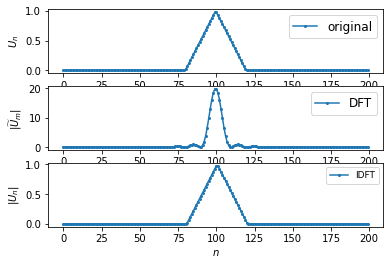

In [15]:
import matplotlib.pyplot as plt
def f(t):
    if -1<t<0:
        ft=1+t
    elif 0<=t<1:
        ft=1-t
    else:
        ft=0
    return ft
tmn=-5
tmx=5
N=200
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
Fs=cntDFT(ft,1)
IFT=cntDFT(Fs,-1)


plt.subplot(311)
plt.plot(ft,linestyle='-',marker='.',ms=4,label='original')
plt.legend(loc='best',prop={'size':12})
plt.ylabel(r'$U_n$')
plt.xlabel(r'$n$')    

plt.subplot(312)
plt.plot([abs(Fs[i]) for i in range(N)],linestyle='-',marker='.',ms=4,label='DFT')
plt.legend(loc='best',prop={'size':12})
plt.ylabel(r'$|\widetilde{U}_m|$')
plt.xlabel(r'$m$')  

plt.subplot(313)
plt.plot([abs(IFT[i]) for i in range(N)],linestyle='-',marker='.',ms=4,label='IDFT')
plt.legend(loc='best',prop={'size':9})
plt.ylabel(r'$|U_n|$')
plt.xlabel(r'$n$')  

plt.show()

##### Transforming coordinates

In [16]:
def Fourspc(x):
    N=len(x)
    dx=x[1]-x[0]
    dk=(2*pi)/(N*dx)
    kmx=(1-1/N)*pi/dx
    k=[-kmx+i*dk for i in range(N)]
    return k

f(t)=1+t (-1<t<0) 

 f(t)=1-t (0<=t<1) 

else 0

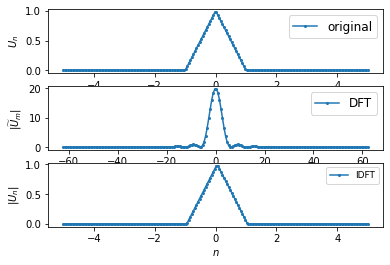

In [17]:
import matplotlib.pyplot as plt
def f(t):
    if -1<t<0:
        ft=1+t
    elif 0<=t<1:
        ft=1-t
    else:
        ft=0
    return ft
tmn=-5
tmx=5
N=200
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
Fs=cntDFT(ft,1)
IFT=cntDFT(Fs,-1)
k=Fourspc(t)

plt.subplot(311)
plt.plot(t,ft,linestyle='-',marker='.',ms=4,label='original')
plt.legend(loc='best',prop={'size':12})
plt.ylabel(r'$U_n$')

plt.subplot(312)
plt.plot(k,[abs(Fs[i]) for i in range(N)],linestyle='-',marker='.',ms=4,label='DFT')
plt.legend(loc='best',prop={'size':12})
plt.ylabel(r'$|\widetilde{U}_m|$')

plt.subplot(313)
plt.plot(t,[abs(IFT[i]) for i in range(N)],linestyle='-',marker='.',ms=4,label='IDFT')
plt.legend(loc='best',prop={'size':9})
plt.ylabel(r'$|U_n|$')
plt.xlabel(r'$n$')  

plt.show()

$f(t)=1 ~,~(-\pi <=t<= \pi)$

$f(t)=0 ~,else $

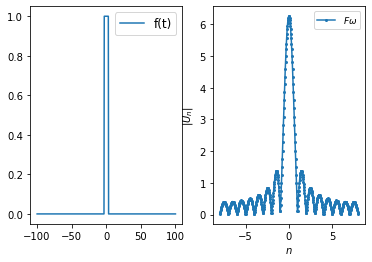

In [18]:
def f(t):
    T=pi
    if -T<=t<=T:
        ft=1
    else:
        ft=0
    return ft
tmn=-100
tmx=100
N=512
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
Fs=cntDFT(ft,1)
k=Fourspc(t)

plt.subplot(121)
plt.plot(t,ft,label='f(t)')
plt.legend(loc='best',prop={'size':12})

plt.subplot(122)
plt.plot(k,[abs(Fs[i])*dt for i in range(N)],linestyle='-',marker='.',ms=4,label=r'$F\omega$')
plt.legend(loc='best',prop={'size':9})
plt.ylabel(r'$|U_n|$')
plt.xlabel(r'$n$')  

plt.show()

signal : $cos(200~t)+\frac{1}{2}~sin(600)~t$

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


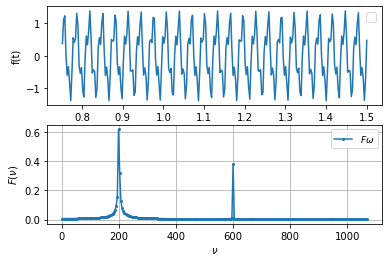

In [19]:
def f(t):
     return cos(200*t)+0.5*sin(600*t)
tmn=0
tmx=1.5
N=512
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
Fs=cntDFT(ft,1)
k=Fourspc(t)


plt.subplot(211)
plt.plot(t[N//2:N],ft[N//2:N])
plt.legend(loc='best',prop={'size':12})
plt.ylabel('f(t)')
plt.subplot(212)
plt.grid()
plt.plot(k[N//2:N],[abs(Fs[i])*dt for i in range(N//2,N,1)],linestyle='-',marker='.',ms=4,label=r'$F\omega$')
plt.legend(loc='best',prop={'size':9})
plt.xlabel(r'$\nu$')  
plt.ylabel(r'$F(\nu)$')
plt.show()

signal : $\sum ~ a_i~sin(\omega_i~t)$

No handles with labels found to put in legend.


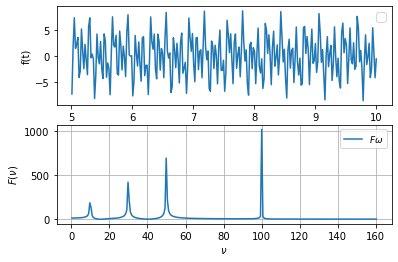

In [20]:
def f(t):
    fr=[10,30,50,100]
    a=[1,2,3,4]
    ff=0
    for i in range(len(fr)):
        ff+=a[i]*sin(fr[i]*t)
    return ff
tmn=0
tmx=10
N=512
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
Fs=cntDFT(ft,1)
k=Fourspc(t)

plt.subplot(211)
plt.plot(t[N//2:N],ft[N//2:N])
plt.legend(loc='best',prop={'size':12})
plt.ylabel('f(t)')
plt.subplot(212)
plt.grid(True)
plt.plot(k[N//2:N],[abs(Fs[i]) for i in range(N//2,N,1)],label=r'$F\omega$')
plt.legend(loc='best',prop={'size':9})
plt.xlabel(r'$\nu$')  
plt.ylabel(r'$F(\nu)$')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


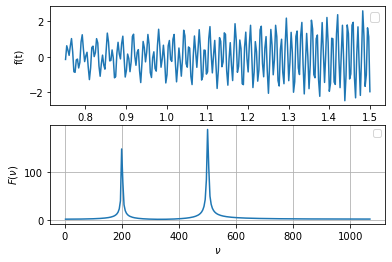

In [21]:
def f(t):
    return exp(-0.5*t)*sin(200*t)+t**2*cos(500*t)
tmn=0
tmx=1.5
N=512
dt=(tmx-tmn)/(N-1)
t=[tmn+i*dt for i in range(N)]
ft=[f(tt) for tt in t]
Fs=cntDFT(ft,1)
k=Fourspc(t)

plt.subplot(211)
plt.plot(t[N//2:N],ft[N//2:N])
plt.legend(loc='best',prop={'size':12})
plt.ylabel('f(t)')
plt.xlabel('t')
plt.subplot(212)
plt.grid(True)
plt.plot(k[N//2:N],[abs(Fs[i]) for i in range(N//2,N,1)])
plt.legend(loc='best',prop={'size':9})
plt.xlabel(r'$\nu$')  
plt.ylabel(r'$F(\nu)$')
plt.show()

##### Fast Fourier transform

In [22]:
def fft2(ft,isg):
    N=len(ft)
    if N==1:
        F=ft
    else:
        Am=fft2(ft[::2],isg)
        Bm=fft2(ft[1::2],isg)
        m=np.arange(N/2)
        W=np.exp(-isg*2J*np.pi*m/N)
        F=np.concatenate([Am+W*Bm,Am-W*Bm])
    return F
def fft(ft,isg):
    N=len(ft)
    if isg ==1 :
        return fft2(ft,isg)
    elif isg==-1:
        return fft2(ft,isg)/N
def cntFFT(ft,isg):
    N=len(ft)
    a=(N-1)/2
    exft=[exp(2j*pi*a*i/N)*ft[i] for i in range(N)]
    Fs=fft(exft,isg)
    Fs=[exp(2j*pi*a*(i-a)/N)*Fs[i] for i in range(N)]
    return Fs

signal : $cos(f_0~x)~e^{(-x^2/\sigma^2)}$

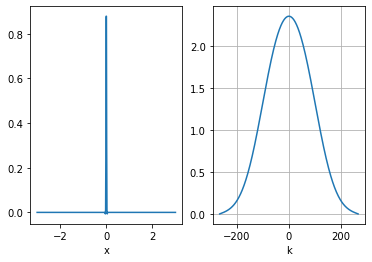

In [23]:
def f(pr,x):
    sig,f0=pr
    return cos(f0*x)*exp(-x**2/sig**2)
xmn=-3
xmx=3
N=512
dt=(xmx-xmn)/(N-1)
x=[xmn+i*dt for i in range(N)]
sig,f0=0.02,50
pr=[sig,f0]
fx=[f(pr,xx) for xx in x]
plt.subplot(121)
plt.plot(x,fx,label='f(x)')
plt.xlabel('x')
k=Fourspc(x)
fk=cntFFT(fx,1)
plt.subplot(122)
plt.grid(True)
plt.plot(k,[abs(fk[i]) for i in range(N)],label='F(k)')
plt.xlabel('k')
plt.show()

Signal : $ e^{cos(x)} $

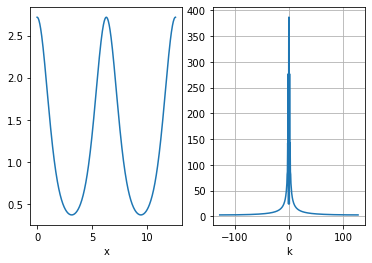

In [24]:
def f(x):
    return exp(cos(x))
xmn=0
xmx=4*pi
N=512
dt=(xmx-xmn)/(N-1)
x=[xmn+i*dt for i in range(N)]
fx=[f(xx) for xx in x]
plt.subplot(121)
plt.plot(x,fx,label='f(x)')
plt.xlabel('x')
k=Fourspc(x)
fk=cntFFT(fx,1)
plt.subplot(122)
plt.grid(True)
plt.plot(k,[abs(fk[i]) for i in range(N)],label='F(k)')
plt.xlabel('k')
plt.show()

##### Fast Fourier Transform using Scipy

In [25]:
from scipy.fftpack import*

In [26]:
np.set_printoptions(precision=4,suppress=True)


In [27]:
fx=np.array([1.0,2.0,1.0,-1.0,1.5,1.0])
FFTfx=fft(fx)
fx1=ifft(FFTfx)
print(fx)
print(FFTfx)
print(fx1)

[ 1.   2.   1.  -1.   1.5  1. ]
[ 5.5 -0.j     2.25-0.433j -2.75-1.299j  1.5 -0.j    -2.75+1.299j
  2.25+0.433j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5-0.j  1. +0.j]


##### Centered Fast Fourier Transform using Scipy

In [28]:
def scipyCntFFT(fx):
    N=len(fx)
    a=(N-1)/2
    exft=[np.exp(2j*np.pi*a*i/N)*fx[i] for i in range(N)]
    Fs=fft(exft)
    Fs=[np.exp(2j*np.pi*a*(i-a)/N)*Fs[i] for i in range(N)]
    return Fs

##### Wave function

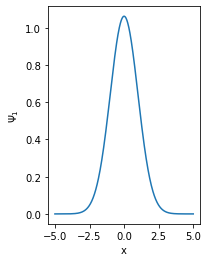

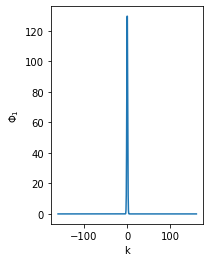

In [29]:
def wvFnc(al,x):
    return (4*al**3/np.pi)**0.25*np.exp(-al*x**2/2)
m=1
hbar=1
omg=1
xmn=-5
xmx=5
N=512
al=m*omg/hbar
dx=(xmx-xmn)/(N-1)
x=[xmn+i*dx for i in range(N)]
fx=[wvFnc(al,xx) for xx in x]
plt.subplot(121)
plt.plot(x,fx)
plt.xlabel('x')
plt.ylabel(r'$\Psi_1$')
plt.show()

k=Fourspc(x)
Fs=scipyCntFFT(fx)
plt.subplot(122)
plt.plot(k,Fs)
plt.xlabel('k')
plt.ylabel(r'$\Phi_1$')
plt.show()

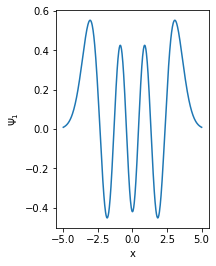

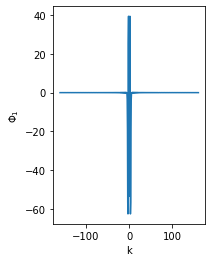

In [30]:
def wvFnc(al,x):
    return (1/12)*(al/(25*pi))**0.25*(8*al**3*x**6-60*al**2*x**4+90*al*x**2-15)*exp(-0.5*al*x**2)
m=1
hbar=1
omg=1
xmn=-5
xmx=5
N=512
al=m*omg/hbar
dx=(xmx-xmn)/(N-1)
x=[xmn+i*dx for i in range(N)]
fx=[wvFnc(al,xx) for xx in x]
plt.subplot(121)
plt.plot(x,fx)
plt.xlabel('x')
plt.ylabel(r'$\Psi_1$')
plt.show()

k=Fourspc(x)
Fs=scipyCntFFT(fx)
plt.subplot(122)
plt.plot(k,Fs)
plt.xlabel('k')
plt.ylabel(r'$\Phi_1$')
plt.show()

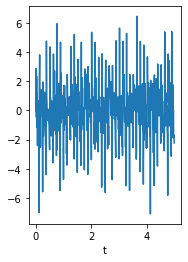

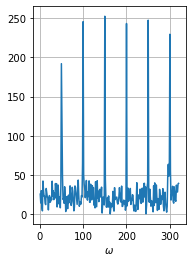

In [31]:
def f(t):
    a=2
    nu=[50,100,150,200,250,300]
    n=len(nu)
    rnd=np.random.uniform(size=n+1)
    ft=0
    for i in range(n):
        ft+=a*rnd[i+1]*np.sin(nu[i]*t)
    return ft
xmx=5
N=512
al=m*omg/hbar
x=np.linspace(0,xmx,N)
fx=[f(tt) for tt in x]
plt.subplot(121)
plt.plot(x,fx)
plt.xlabel('t')
plt.show()

k=Fourspc(x)
Fs=scipyCntFFT(fx)
plt.subplot(122)
plt.plot(k[N//2:N],[abs(Fs[i]) for i in range(N//2,N,1)])
plt.grid()
plt.xlabel(r'$\omega$')
plt.show()

In [34]:
from scipy.integrate import*
def coefs(fnx,N):
    def fc(x,n):
        return fnc(x)*cos(n*x)
    def fs(x,n):
        return fnc(x)*sin(n*x)
    anbn=[]
    for n in range(N+1):
        an=quad(fc,0,2*pi,args=(n))[0]/pi
        bn=quad(fs,0,2*pi,args=(n))[0]/pi
        anbn.append([an,bn])
    return anbn
def FourSer(x,anbn):
    Nx=len(x)
    fx=[0 for i in range(Nx)]
    for n in range(len(anbn)):
        a=anbn[n][0]
        b=anbn[n][1]
        for i in range(Nx):
            if n==0:
                fft=a/2
            else:
                fft=a*cos(n*x[i])+b*sin(n*x[i])
            fx[i]+=fft
    return fx

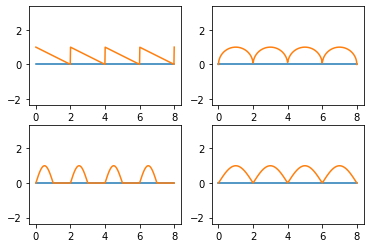

In [33]:
def f1(x):
    n=int(x/T)+1
    ff=(n*T-x)/T
    return ff
def f2(x):
    n=int(x/T)+1
    ff=((T/2)**2 - (x-(2*n-1)*T/2)**2)**0.5
    return ff
def f3(x):
    n=int(x/T)+1
    if (n-1)*T <= x< (2*n-1)*T/2:
        ff=abs(sin(x*pi))
    elif (2*n-1)*T/2 <= x <n*T:
        ff=0
    return ff
def f4(x):
    ff=abs(sin(x*pi/2))
    return ff
N=2**9
dx=4*T/(N-1)
x=[i*dx for i in range(N)]
plt.subplot(221)
ff=[f1(xx) for xx in x]
plt.axis('equal')
plt.plot(x,[0 for xx in x])
plt.plot(x,ff)

plt.subplot(222)
ff=[f2(xx) for xx in x]
plt.axis('equal')
plt.plot(x,[0 for xx in x])
plt.plot(x,ff)

plt.subplot(223)
ff=[f3(xx) for xx in x]
plt.axis('equal')
plt.plot(x,[0 for xx in x])
plt.plot(x,ff)

plt.subplot(224)
ff=[f4(xx) for xx in x]
plt.axis('equal')
plt.plot(x,[0 for xx in x])
plt.plot(x,ff)

plt.show()